<a href="https://colab.research.google.com/github/jingxiangwu/stochastics/blob/main/Black_Scholes_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [4]:
# Black-Scholes analytical formula
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))

    return price

# Monte Carlo simulation for option pricing
def monte_carlo_option(S, K, T, r, sigma, option_type='call', n_simulations=10000):
    np.random.seed(42)

    # Simulate end stock price paths using Geometric Brownian Motion
    Z = np.random.standard_normal(n_simulations)
    ST = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)

    # Compute option payoff for each path
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)

    # Discount the payoff back to present value and compute average
    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price

Black-Scholes Call Price: 10.4506
Monte Carlo Call Price:   10.4739
Black-Scholes Put Price:  5.5735
Monte Carlo Put Price:    5.5742


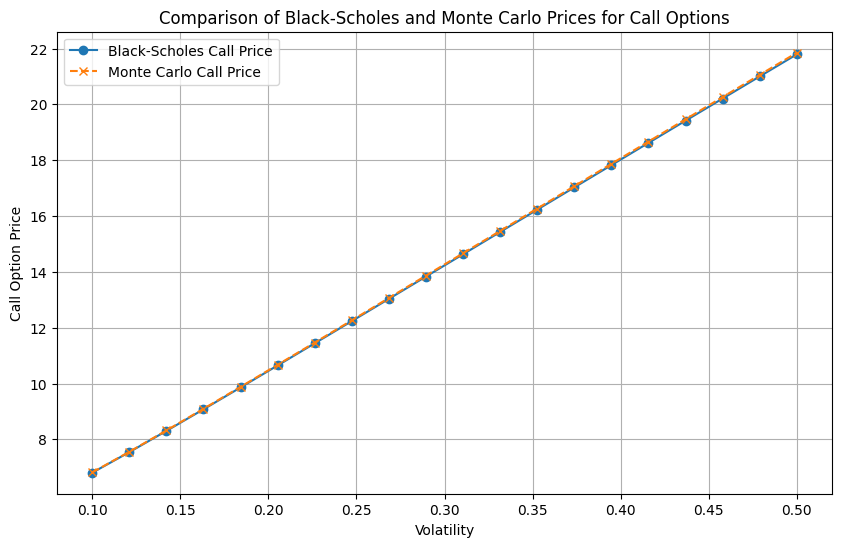

In [5]:
# Parameters
S = 100  # Initial stock price
K = 100  # Strike price
T = 1.0  # Time to maturity (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Step 1: Calculate Black-Scholes price for call and put options
bs_call_price = black_scholes(S, K, T, r, sigma, option_type='call')
bs_put_price = black_scholes(S, K, T, r, sigma, option_type='put')

# Step 2: Monte Carlo simulation for call and put option pricing
mc_call_price = monte_carlo_option(S, K, T, r, sigma, option_type='call', n_simulations=100000)
mc_put_price = monte_carlo_option(S, K, T, r, sigma, option_type='put', n_simulations=100000)

# Print results
print(f"Black-Scholes Call Price: {bs_call_price:.4f}")
print(f"Monte Carlo Call Price:   {mc_call_price:.4f}")
print(f"Black-Scholes Put Price:  {bs_put_price:.4f}")
print(f"Monte Carlo Put Price:    {mc_put_price:.4f}")

# Step 3: Comparison across different volatility assumptions
volatilities = np.linspace(0.1, 0.5, 20)
bs_call_prices = [black_scholes(S, K, T, r, vol, option_type='call') for vol in volatilities]
mc_call_prices = [monte_carlo_option(S, K, T, r, vol, option_type='call', n_simulations=100000) for vol in volatilities]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(volatilities, bs_call_prices, label='Black-Scholes Call Price', marker='o')
plt.plot(volatilities, mc_call_prices, label='Monte Carlo Call Price', marker='x', linestyle='--')
plt.xlabel('Volatility')
plt.ylabel('Call Option Price')
plt.title('Comparison of Black-Scholes and Monte Carlo Prices for Call Options')
plt.legend()
plt.grid(True)
plt.show()